<a href="https://colab.research.google.com/github/PSLMssGerd44/Works-/blob/main/Feeling_analysisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Many-to-one architecture

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import seaborn as sns

In [ ]:
path = "/content/IMDB Dataset.csv"

In [ ]:
data_set = pd.read_csv(path)

In [ ]:
data_set.shape

(50000, 2)

In [ ]:
data_set.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [ ]:
len(data_set['review'][0])

1761

In [ ]:
len(data_set['review'][1])

998

In [ ]:
data_train = data_set.iloc[0:25000,:]
data_test = data_set.iloc[25000:,:]

In [ ]:
data_train.shape

(25000, 2)

In [ ]:
data_test.shape

(25000, 2)

In [ ]:
data_train.groupby('sentiment').count()/25000

review
sentiment         
negative   0.50104
positive   0.49896

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


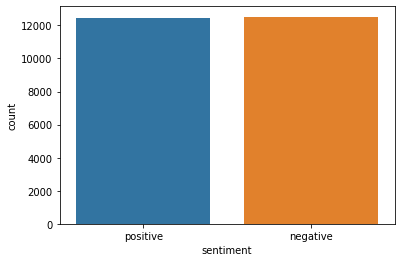

In [ ]:
sns.countplot(data_train['sentiment'])

In [ ]:
tokenizer = Tokenizer(num_words=10000)

In [ ]:
tokenizer.fit_on_texts(data_train['review'])

In [ ]:
X_train = tokenizer.texts_to_sequences(data_train['review'])
X_test = tokenizer.texts_to_sequences(data_test['review'])

X_train

[[27,
  4,
  1,
  77,
  2019,
  45,
  1006,
  12,
  100,
  147,
  39,
  318,
  3335,
  425,
  450,
  26,
  3076,
  33,
  23,
  197,
  14,
  11,
  6,
  602,
  48,
  596,
  15,
  69,
  7,
  7,
  1,
  87,
  148,
  12,
  3387,
  69,
  41,
  3335,
  13,
  92,
  5350,
  2,
  133,
  4,
  543,
  60,
  271,
  8,
  197,
  36,
  1,
  649,
  139,
  1686,
  69,
  11,
  6,
  21,
  3,
  118,
  16,
  1,
  8001,
  2225,
  38,
  11,
  118,
  2518,
  54,
  5451,
  15,
  5151,
  5,
  1345,
  383,
  38,
  543,
  92,
  6,
  3879,
  8,
  1,
  354,
  346,
  4,
  1,
  649,
  7,
  7,
  9,
  6,
  432,
  3335,
  14,
  12,
  6,
  1,
  356,
  5,
  1,
  5769,
  2713,
  1178,
  9,
  2754,
  1405,
  20,
  525,
  32,
  4755,
  2678,
  4,
  1,
  1236,
  119,
  29,
  1,
  6968,
  25,
  3090,
  2,
  385,
  34,
  6,
  21,
  316,
  20,
  1,
  4476,
  7279,
  525,
  6,
  350,
  5,
  105,
  7179,
  4438,
  8002,
  2289,
  2,
  50,
  34,
  326,
  8151,
  6618,
  2,
  9654,
  23,
  110,
  236,
  241,
  7,
  7,
  10,
  58,
  132

In [ ]:
X_train = pad_sequences(X_train, maxlen=500)
X_test = pad_sequences(X_test, maxlen=500)

In [ ]:
len(np.unique(X_train))

10000

In [ ]:
y_train = data_train['sentiment'].map({'positive':1, 'negative':0 })
y_test = data_test['sentiment'].map({'positive':1, 'negative':0 })

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Embedding(input_dim=10000 , output_dim=32, input_length=500),
                                 keras.layers.LSTM(20),
                                 keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm_7 (LSTM)               (None, 20)                4240      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 324,261
Trainable params: 324,261
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.fit(X_train,y_train, epochs=5, batch_size=512, validation_data=(X_test,y_test))

Epoch 1/5
49/49 [==============================] - 49s 917ms/step - loss: 0.6639 - acc: 0.6531 - val_loss: 0.5131 - val_acc: 0.7766
Epoch 2/5
49/49 [==============================] - 32s 665ms/step - loss: 0.4313 - acc: 0.8217 - val_loss: 0.3614 - val_acc: 0.8584
Epoch 3/5
49/49 [==============================] - 34s 690ms/step - loss: 0.2886 - acc: 0.8930 - val_loss: 0.2977 - val_acc: 0.8840
Epoch 4/5
49/49 [==============================] - 32s 659ms/step - loss: 0.2159 - acc: 0.9243 - val_loss: 0.2881 - val_acc: 0.8860
Epoch 5/5
49/49 [==============================] - 32s 657ms/step - loss: 0.1769 - acc: 0.9422 - val_loss: 0.2844 - val_acc: 0.8852


In [ ]:
comentario_1 = ["I've never seen anything so bad in this world"]
comentario_2 = ["The moveio was not good"]

In [ ]:
comentario = tokenizer.texts_to_sequences(comentario_2)

In [ ]:
comentario = pad_sequences(comentario, maxlen=500)

In [ ]:
model.predict(comentario)

array([[0.37338755]], dtype=float32)

In [ ]:
predictions = (model.predict(comentario) > 0.5).astype("int32")